In [163]:
from stanford_cs229.modeling.softmax import SoftmaxRegression
from stanford_cs229.modeling.k_means import KMeans
from stanford_cs229.modeling.perceptron import train_perceptron, predict_perceptron
from stanford_cs229.utils.util import load_our_data, plot, preprocess_rolling_avg, cmap
from stanford_cs229.utils.csv_plotter_classifier import format_data

import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib notebook

# Number of class for learning
K = 5
plt_counter = 0

# Load data and preprocess for K-means
raw_data = load_our_data('stanford_cs229/data/ydeskx_overhand_weight_4-60Hz_extended.csv')
raw_data = raw_data / raw_data.max()
X_tr = preprocess_rolling_avg(raw_data)
X_tr = X_tr / X_tr.max()

shuffler = np.random.permutation(raw_data.shape[0])
X_tr = X_tr[shuffler]
raw_data = raw_data[shuffler]


# Run K-means to get labels
print("** Running K-means to label raw data **")
k_means = KMeans(verbose=True)
Y_tr_k_means = k_means.assign(X_tr, K, random=True)

** Running K-means to label raw data **
Iteration: 1, Loss: 373.64675513556574
Iteration: 2, Loss: 254.34554327564425
Iteration: 3, Loss: 231.23379848354136
Iteration: 4, Loss: 225.03666231770802
Iteration: 5, Loss: 222.82620263936536
Iteration: 6, Loss: 221.05811971843715
Iteration: 7, Loss: 218.16948051727297
Iteration: 8, Loss: 208.77991602236105
Iteration: 9, Loss: 191.04963112463844
Iteration: 10, Loss: 180.01446301322372
Iteration: 11, Loss: 175.7027538326052
Iteration: 12, Loss: 174.2018934380838
Iteration: 13, Loss: 173.6965228939021
Iteration: 14, Loss: 173.47723365074748
Iteration: 15, Loss: 173.38289545144232
Iteration: 16, Loss: 173.3539438938821
Iteration: 17, Loss: 173.33959597685532
Iteration: 18, Loss: 173.33685029347103
Iteration: 19, Loss: 173.33555200298338
Iteration: 20, Loss: 173.33527932562484
Iteration: 21, Loss: 173.33521625702883
Iteration: 22, Loss: 173.33518671806675
Iteration: 23, Loss: 173.33518671806675
Time: 0:00:21.807734


<IPython.core.display.Javascript object>


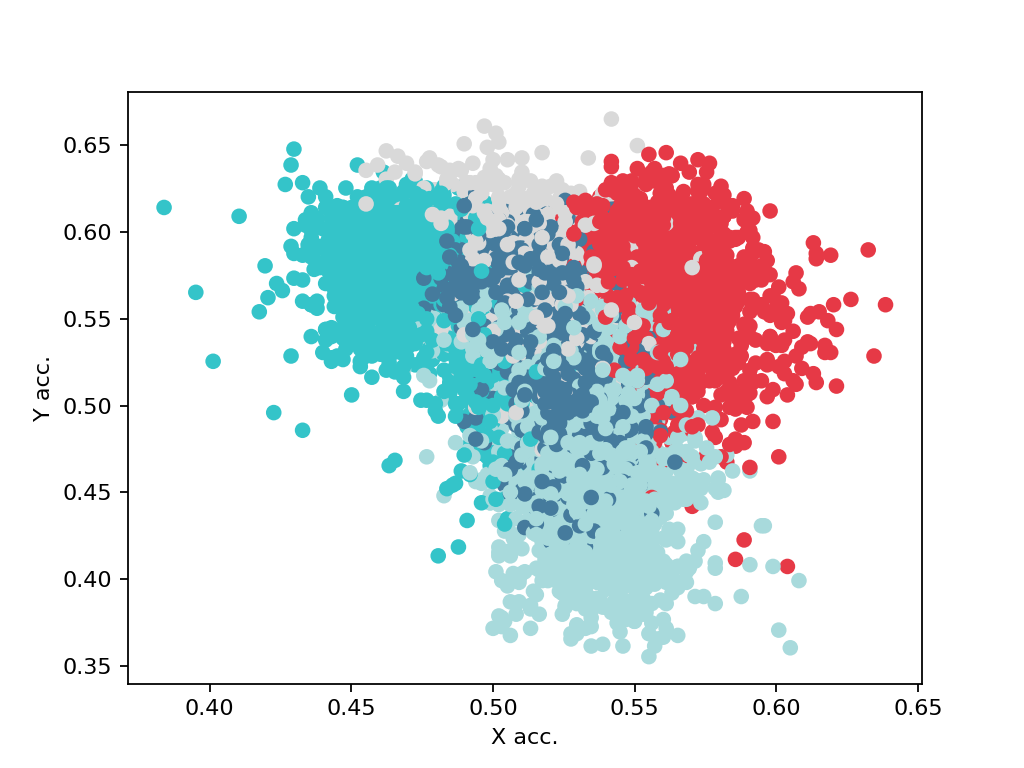

<IPython.core.display.Javascript object>


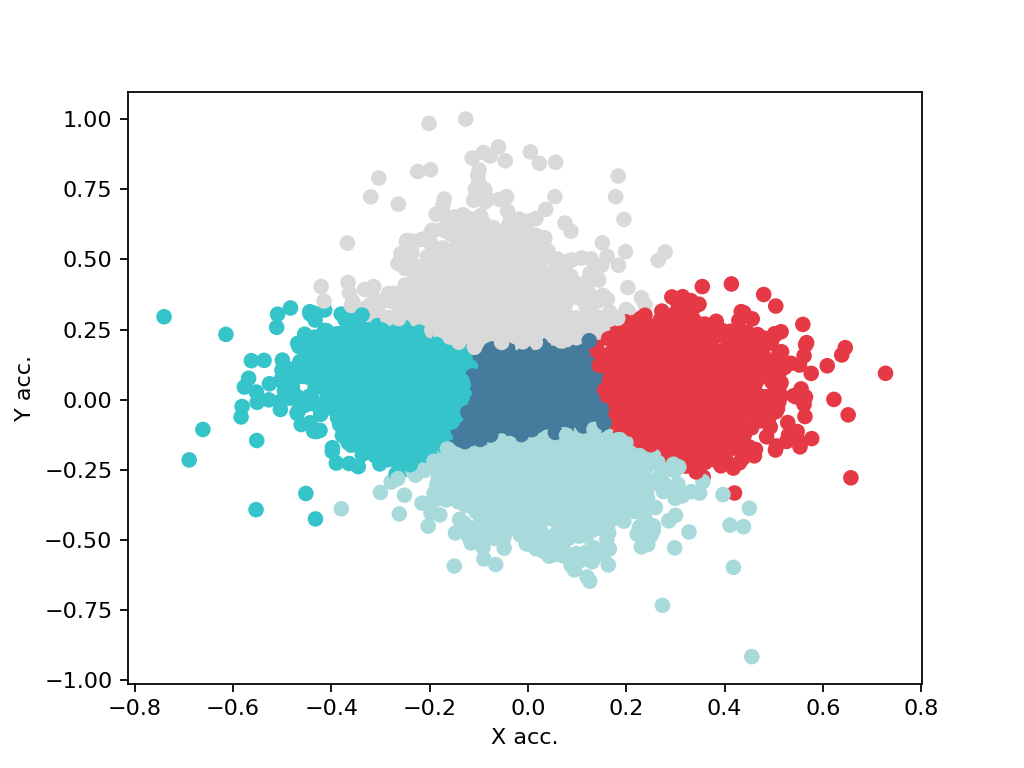

Text(0, 0.5, 'Y acc.')

In [164]:
# Plot raw data
fig1 = plt.figure(plt_counter)
plt_counter += 1
ax1 = plt.axes()
ax1.scatter(raw_data[:,0], raw_data[:,1], c=cmap(Y_tr_k_means))
ax1.set_xlabel('X acc.')
ax1.set_ylabel('Y acc.')

# Plot preprocessed data
fig2 = plt.figure(plt_counter)
plt_counter += 1
ax2 = plt.axes()
ax2.scatter(X_tr[:,0], X_tr[:,1], c=cmap(Y_tr_k_means))
ax2.set_xlabel('X acc.')
ax2.set_ylabel('Y acc.')

In [165]:
# Save plots
save_new_plots = False

if save_new_plots:
  plt.figure(fig1.number)
  plt.savefig('manual_labeling.png', dpi=300)
  plt.figure(fig2.number)
  plt.savefig('k_means_labeling.png', dpi=300)

In [166]:
# Train softmax classifier and make predictions
softmax = SoftmaxRegression(lr=0.01, max_iter=1000, verbose=False)

print('** Training softmax classifier **')
softmax.train(X_tr, Y_tr_k_means, K)

print('** Making predictions **')
Y_pred = softmax.predict(X_tr)

accuracy = np.sum(Y_pred == Y_tr_k_means) / Y_tr_k_means.size
print(accuracy)

** Training softmax classifier **
Training Time: 0:00:01.012958
** Making predictions **
0.5071666666666667


<IPython.core.display.Javascript object>


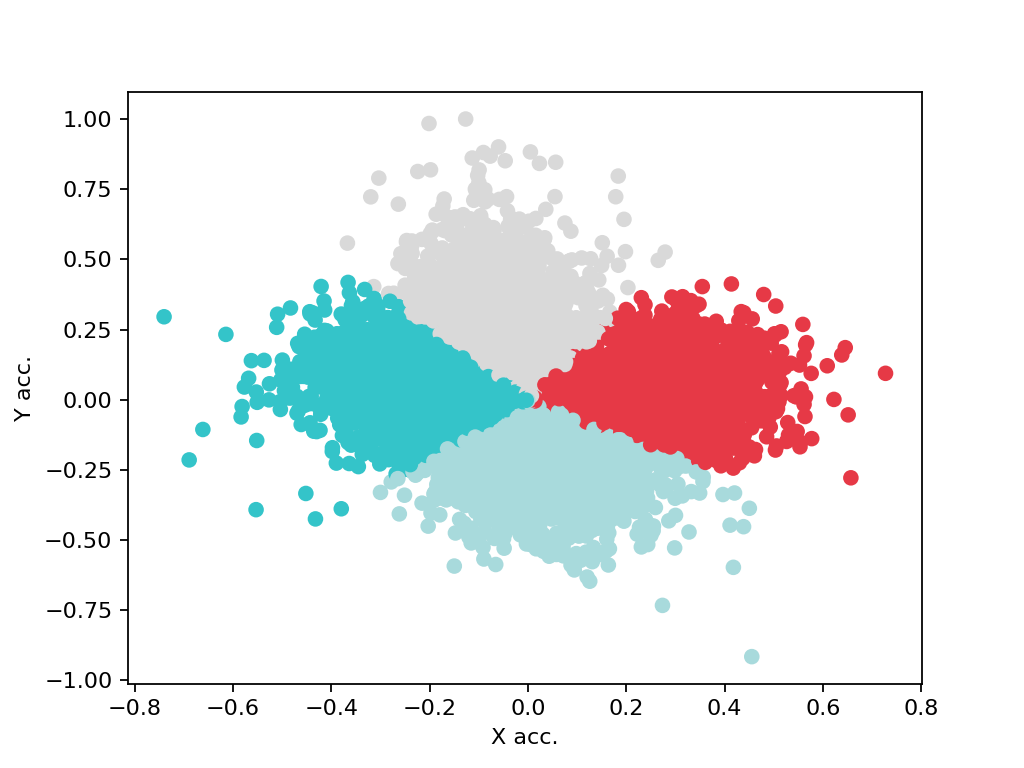

Text(0, 0.5, 'Y acc.')

In [167]:
# Plot data with predicted labels
fig3 = plt.figure(plt_counter)
plt_counter += 1
ax3 = plt.axes()
ax3.scatter(X_tr[:,0], X_tr[:,1], c=cmap(Y_pred))
ax3.set_xlabel('X acc.')
ax3.set_ylabel('Y acc.')

In [168]:
from stanford_cs229.modeling.perceptron import train_perceptron, predict_perceptron

def get_neutral_class():
  for c in np.unique(Y_tr_k_means):
    if c not in np.unique(Y_pred):
      return c

neutral_class = get_neutral_class()
Y_tr_perceptron = np.where(Y_tr_k_means==neutral_class, 0, 1)

# Make neutral class have 0 label by swapping labels with whatever class has the 0 label
Y_pred = np.where(Y_pred==0, neutral_class, Y_pred)

# Make neutral class have 0 label by swapping labels with whatever class has the 0 label
k_means_zeros = np.argwhere(Y_tr_k_means == 0)
k_means_neutral_class = np.argwhere(Y_tr_k_means == neutral_class)
Y_tr_k_means[k_means_zeros] = neutral_class
Y_tr_k_means[k_means_neutral_class] = 0

print('** Training perceptron **')
state = train_perceptron(raw_data[:3000, 2:] * 10, Y_tr_perceptron[:3000])
print('** Predicting perceptron **')
predictions = np.array([predict_perceptron(state, raw_data[i, 2:] * 10) for i in range(3000)])

** Training perceptron **
Completed 0 iterations
Completed 100 iterations
Completed 200 iterations
Completed 300 iterations
Completed 400 iterations
Completed 500 iterations
Completed 600 iterations
Completed 700 iterations
Completed 800 iterations
Completed 900 iterations
Completed 1000 iterations
Completed 1100 iterations
Completed 1200 iterations
Completed 1300 iterations
Completed 1400 iterations
Completed 1500 iterations
Completed 1600 iterations
Completed 1700 iterations
Completed 1800 iterations
Completed 1900 iterations
Completed 2000 iterations
Completed 2100 iterations
Completed 2200 iterations
Completed 2300 iterations
Completed 2400 iterations
Completed 2500 iterations
Completed 2600 iterations
Completed 2700 iterations
Completed 2800 iterations
Completed 2900 iterations
** Predicting perceptron **


<IPython.core.display.Javascript object>


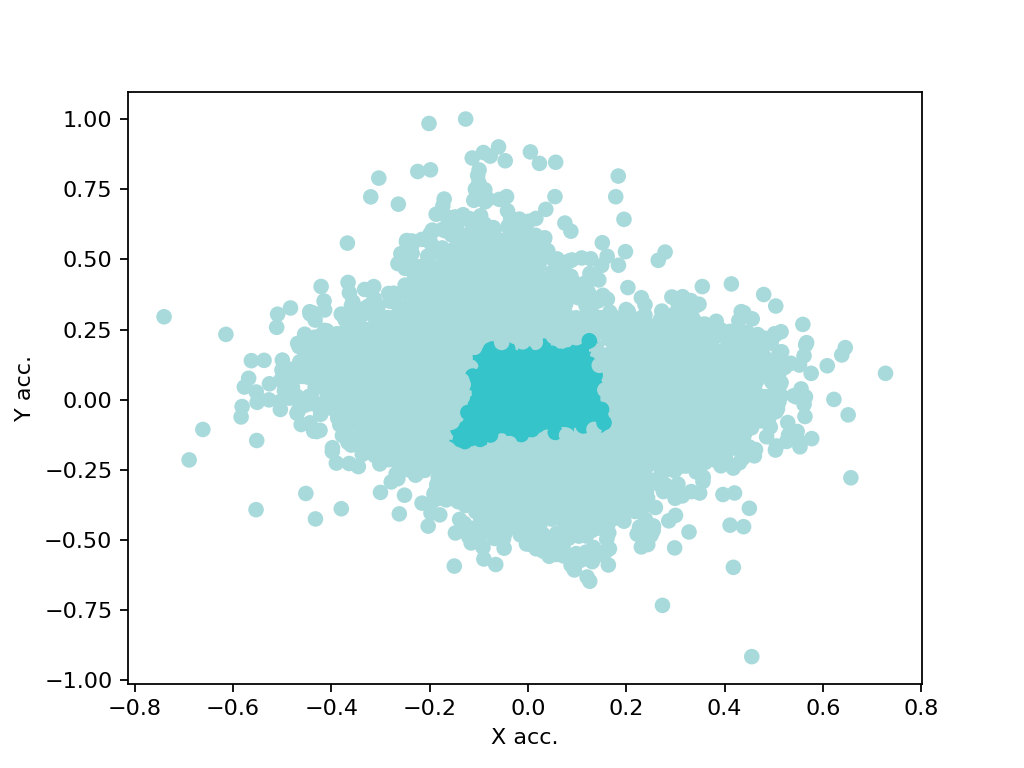

Text(0, 0.5, 'Y acc.')

In [169]:
# Plot data with predicted labels
fig5 = plt.figure(plt_counter)
plt_counter += 1
ax5 = plt.axes()
ax5.scatter(X_tr[:,0], X_tr[:,1], c=cmap(Y_tr_perceptron))
ax5.set_xlabel('X acc.')
ax5.set_ylabel('Y acc.')

<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


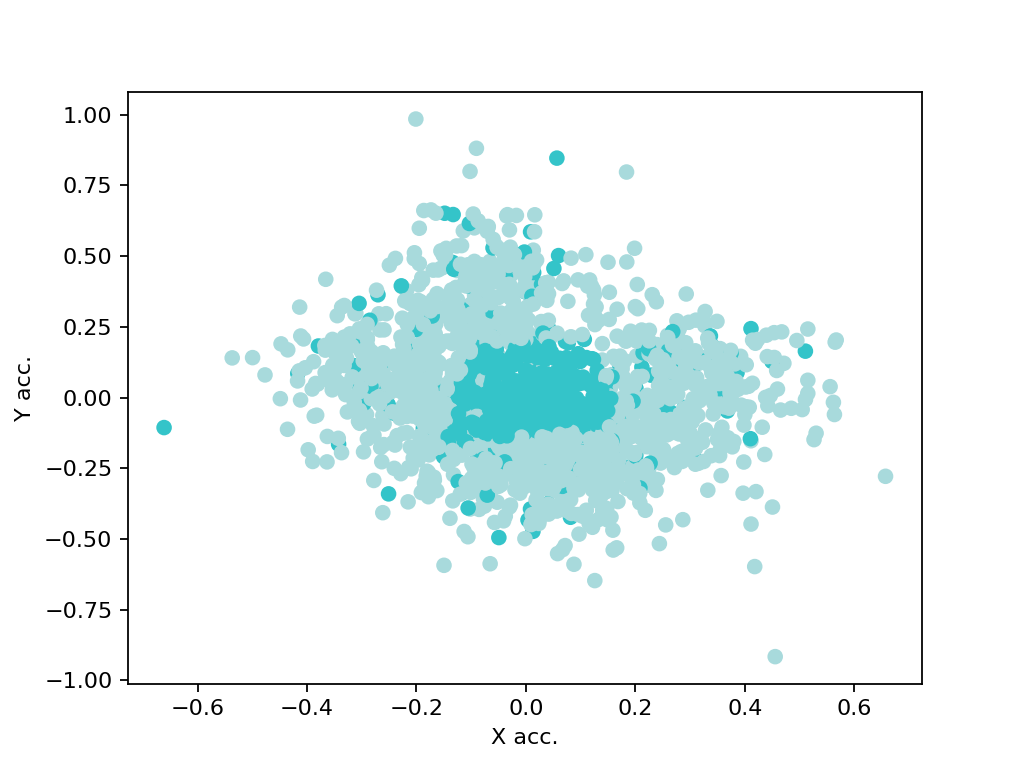

In [170]:
# Plot data with predicted labels
print(type(predictions))
fig6 = plt.figure(plt_counter)
plt_counter += 1
ax6 = plt.axes()
ax6.scatter(X_tr[:3000,0], X_tr[:3000,1], c=cmap(predictions))
ax6.set_xlabel('X acc.')
ax6.set_ylabel('Y acc.')

y = np.expand_dims(Y_tr_perceptron[:1000], axis=1)
x = X_tr[:1000, :]

np.savetxt('x_train.csv', np.hstack((y, x)), delimiter=',')

In [209]:
# Train softmax classifier and make predictions
softmax_2 = SoftmaxRegression(lr=0.005, max_iter=5000, verbose=False)

print('** Training softmax classifier **')
softmax_2.train(raw_data[:3000, 2:], Y_pred[:3000]-1, K-1)

print('** Making predictions **')
Y_pred_2 = softmax_2.predict(raw_data[:3000, 2:]) + 1

accuracy_2 = np.sum(Y_pred_2 == Y_pred[:3000]) / Y_pred[:3000].size
print(accuracy_2)

** Training softmax classifier **
Training Time: 0:00:02.386791
** Making predictions **
0.49833333333333335


<IPython.core.display.Javascript object>


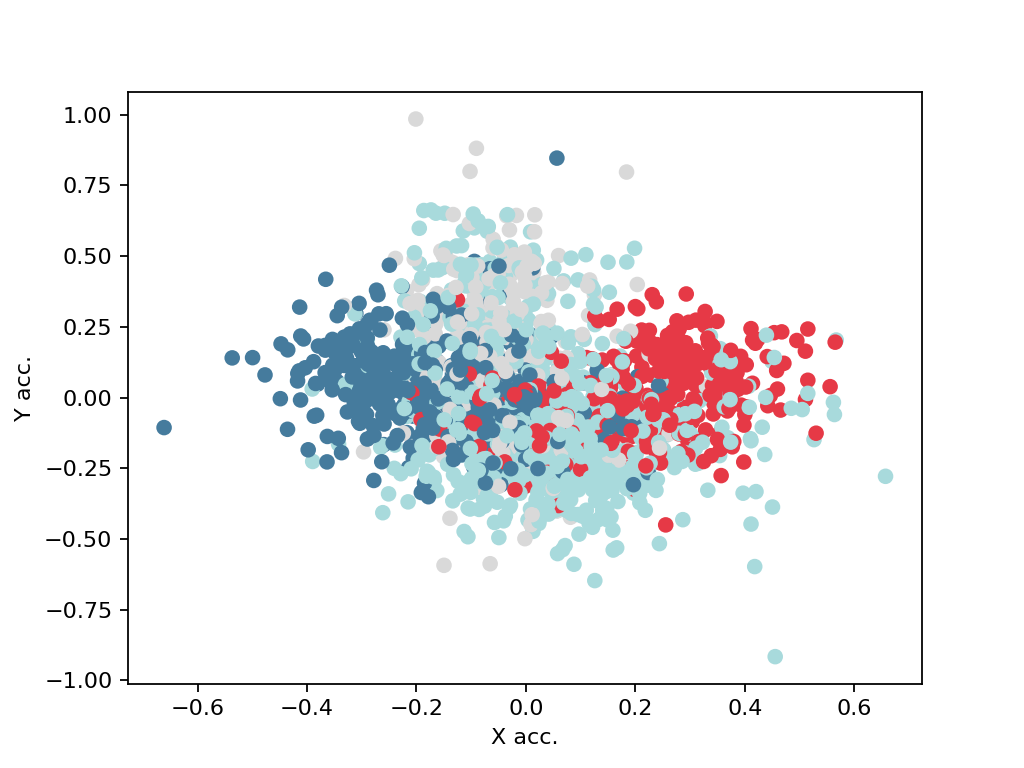

Text(0, 0.5, 'Y acc.')

In [210]:
# Plot data with predicted labels
fig4 = plt.figure(plt_counter)
plt_counter += 1
ax4 = plt.axes()
ax4.scatter(X_tr[:3000,0], X_tr[:3000,1], c=cmap(Y_pred_2))
ax4.set_xlabel('X acc.')
ax4.set_ylabel('Y acc.')

<IPython.core.display.Javascript object>


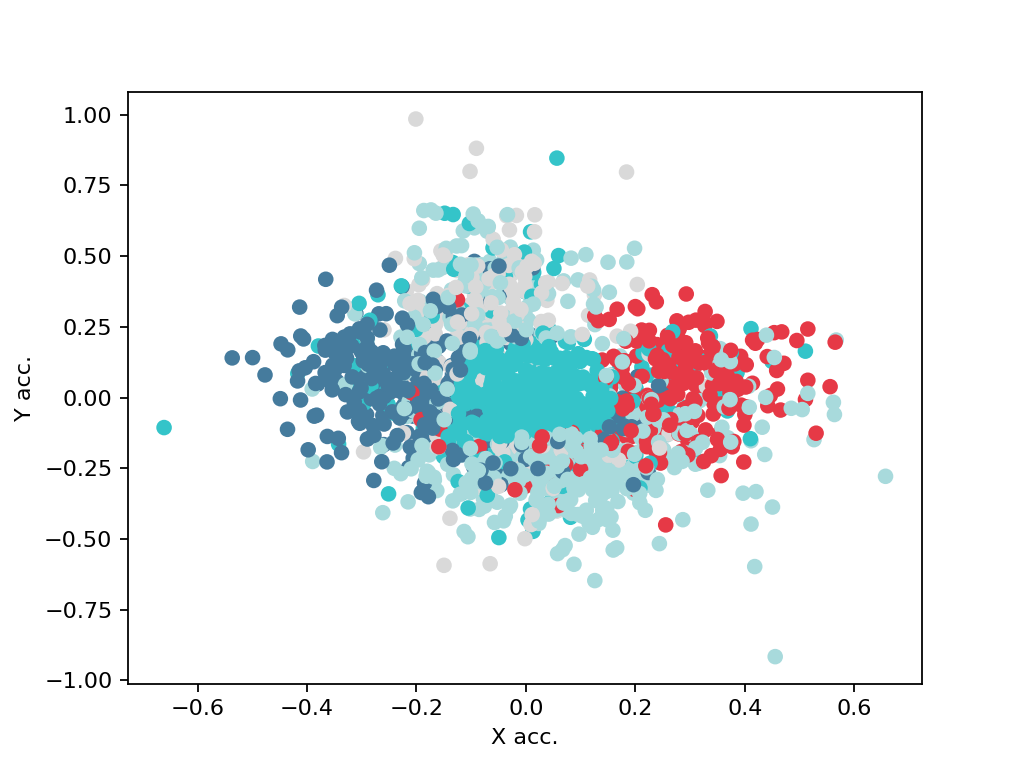

<IPython.core.display.Javascript object>


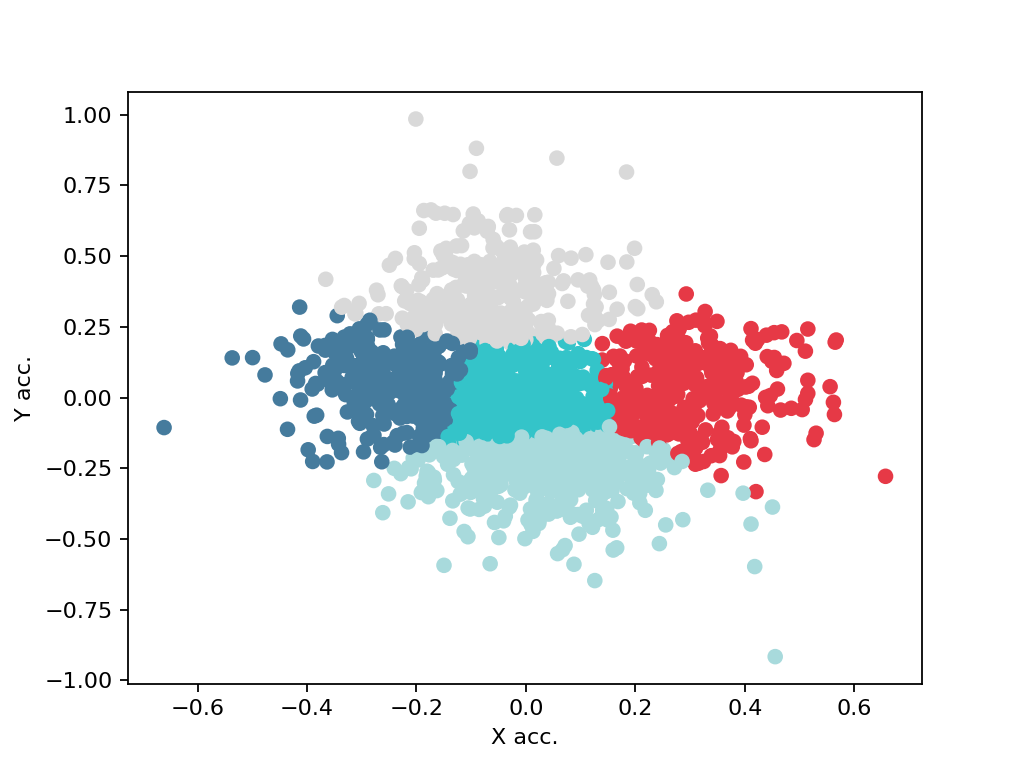

Text(0, 0.5, 'Y acc.')

In [211]:
# Plot data with predicted labels
fig4 = plt.figure(plt_counter)
plt_counter += 1
ax4 = plt.axes()
ax4.scatter(X_tr[:3000,0], X_tr[:3000,1], c=cmap(Y_pred_2 * predictions))
ax4.set_xlabel('X acc.')
ax4.set_ylabel('Y acc.')

# Plot data with predicted labels
fig4 = plt.figure(plt_counter)
plt_counter += 1
ax4 = plt.axes()
ax4.scatter(X_tr[:3000,0], X_tr[:3000,1], c=cmap(Y_tr_k_means[:3000]))
ax4.set_xlabel('X acc.')
ax4.set_ylabel('Y acc.')

In [175]:
# Determine what percent of the data each class makes up
for c in np.unique(Y_tr_k_means[:3000]):
  percent_makup = np.sum(Y_tr_k_means[:3000] == c) / Y_tr_k_means[:3000].size
  print('Percent makup of total data for class {}: {}'.format(c, percent_makup))

# Determine the accuracy on each individual class
labels_for_incorrect_predictions = np.where(Y_tr_k_means[:3000] != Y_pred_2 * predictions, Y_tr_k_means[:3000], -1)
labels_for_incorrect_predictions = labels_for_incorrect_predictions[labels_for_incorrect_predictions >= 0]
for c in np.unique(Y_tr_k_means[:3000]):
  percent_makup = np.sum(labels_for_incorrect_predictions == c) / labels_for_incorrect_predictions.size
  print('Percent makup of incorrect predictions for class {}: {}'.format(c, percent_makup))

Percent makup of total data for class 0: 0.481
Percent makup of total data for class 1: 0.182
Percent makup of total data for class 2: 0.10266666666666667
Percent makup of total data for class 3: 0.123
Percent makup of total data for class 4: 0.11133333333333334
Percent makup of incorrect predictions for class 0: 0.07057546145494029
Percent makup of incorrect predictions for class 1: 0.19109663409337677
Percent makup of incorrect predictions for class 2: 0.30727470141150925
Percent makup of incorrect predictions for class 3: 0.11183496199782844
Percent makup of incorrect predictions for class 4: 0.31921824104234525


In [213]:
accuracy_3 = np.sum(Y_pred_2 * predictions == Y_tr_k_means[:3000]) / Y_tr_k_means[:3000].size
print(accuracy_3)

0.7633333333333333
